In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd

In [2]:
path = "C:/Users/victo/OneDrive/Data science/Datasets/"
file = "CarPrice_Assignment.csv"
df = pd.read_csv(path + file)

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
#Let's eliminate the column 'carbody', 'boreratio':
columns = df.columns.values.tolist()
columns.remove('boreratio')
df_new = df[columns]
columns = df_new.columns.values.tolist()
columns

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [8]:
df_new.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.40,8.0,115,5500,18,22,17450.0


In [9]:
objetcs = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']             

for objt in objetcs:
    unique = df_new[objt].unique().tolist()
    print(f'The unique values for the column {objt} are: \n{unique}\n\n')

The unique values for the column CarName are: 
['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225

In [10]:
#Missing values:
colmns_new = df_new.columns.values.tolist()
for col in colmns_new:
    print(f"For {col}: {pd.isnull(df_new[col]).values.ravel().sum()}\n")

For car_ID: 0

For symboling: 0

For CarName: 0

For fueltype: 0

For aspiration: 0

For doornumber: 0

For carbody: 0

For drivewheel: 0

For enginelocation: 0

For wheelbase: 0

For carlength: 0

For carwidth: 0

For carheight: 0

For curbweight: 0

For enginetype: 0

For cylindernumber: 0

For enginesize: 0

For fuelsystem: 0

For stroke: 0

For compressionratio: 0

For horsepower: 0

For peakrpm: 0

For citympg: 0

For highwaympg: 0

For price: 0



In [11]:
#Detection of duplicates
df_new.duplicated().sum()

0

Linear models:

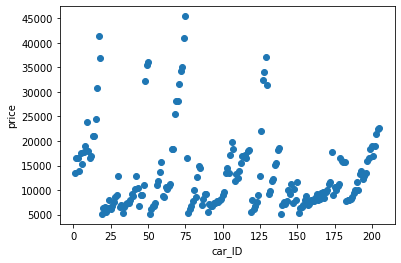

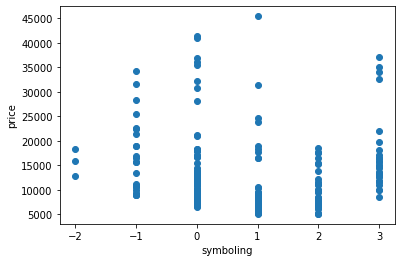

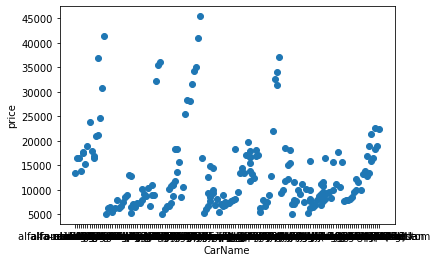

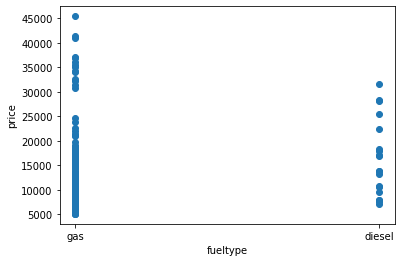

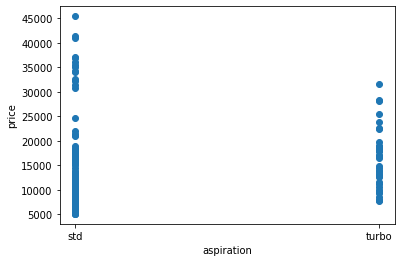

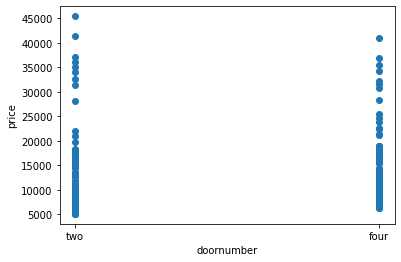

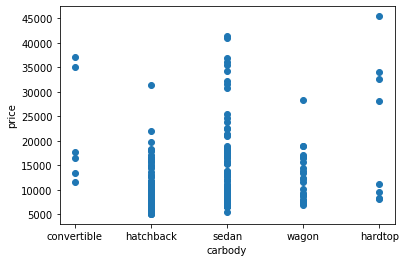

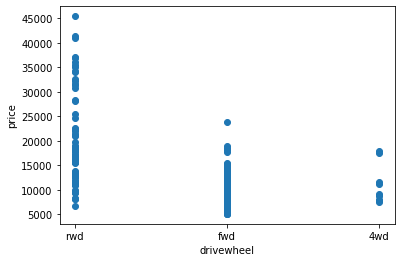

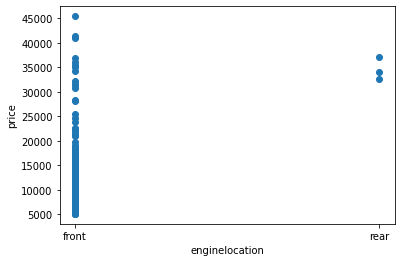

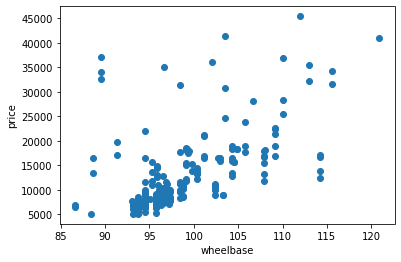

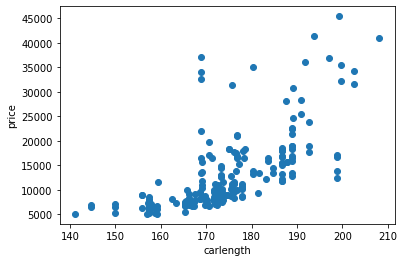

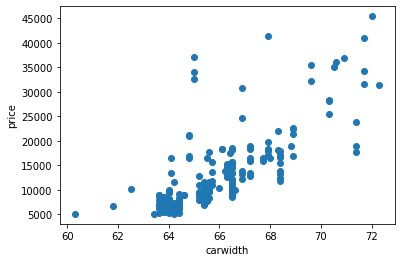

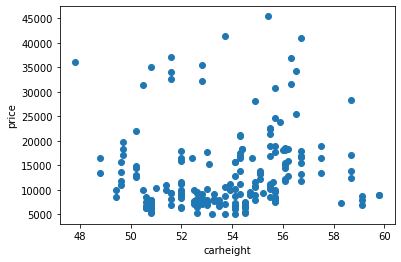

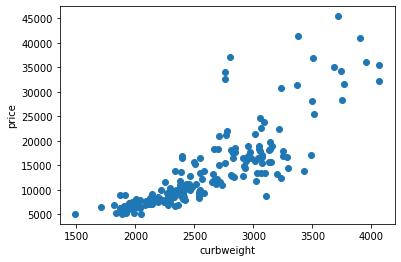

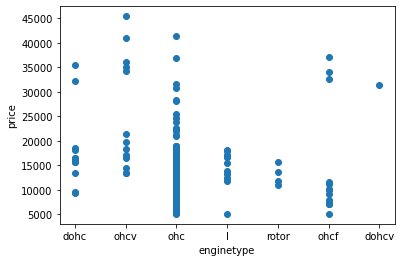

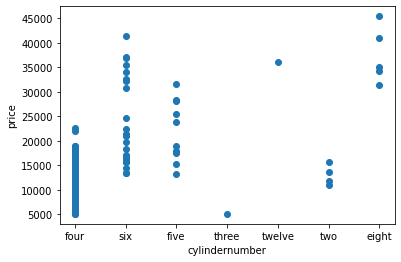

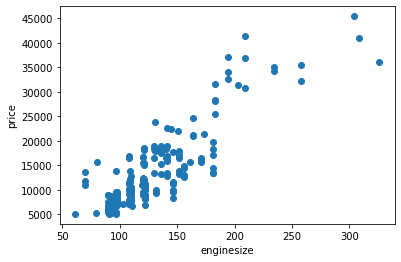

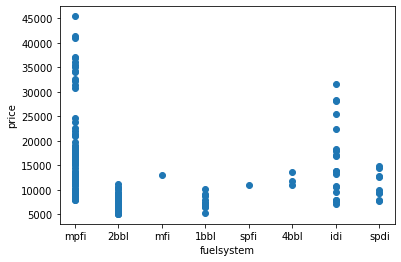

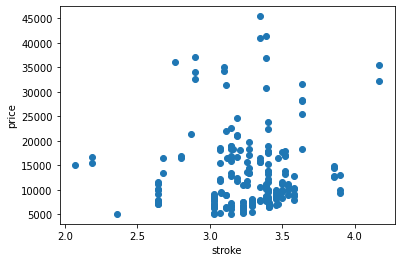

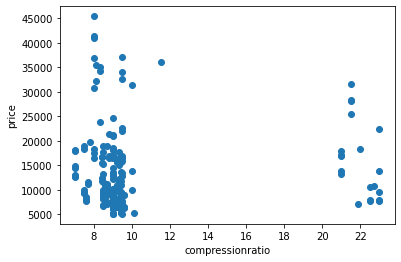

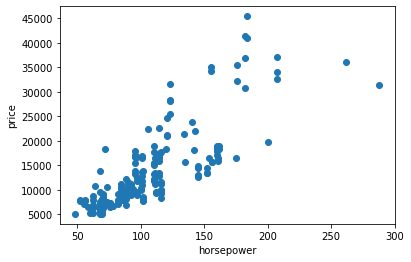

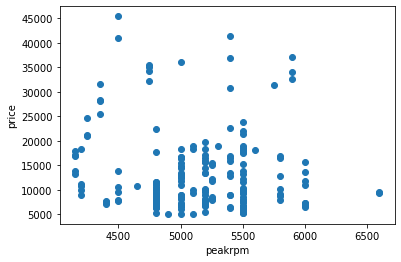

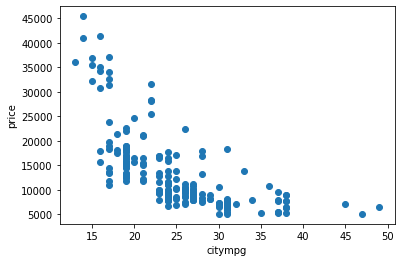

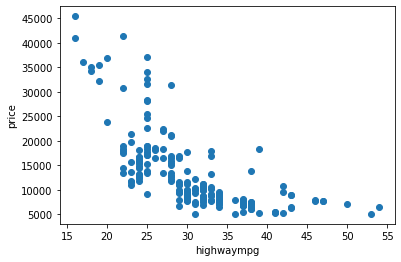

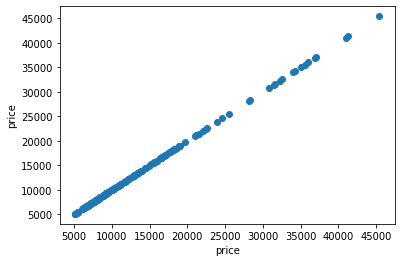

In [12]:
for col in colmns_new:
    plt.scatter(df_new[col], df_new['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

We can see that there are linear relations with the price for curbweight, enginesize, horse power (maybe it could be added carlenght, carwidth and aspiration, too). Let's create a linear model

In [13]:
interested_col = ['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth', 'aspiration', 'price']
for col in interested_col:
    print(f"{col}: {df_new[col].dtype}")

curbweight: int64
enginesize: int64
horsepower: int64
carlength: float64
carwidth: float64
aspiration: object
price: float64


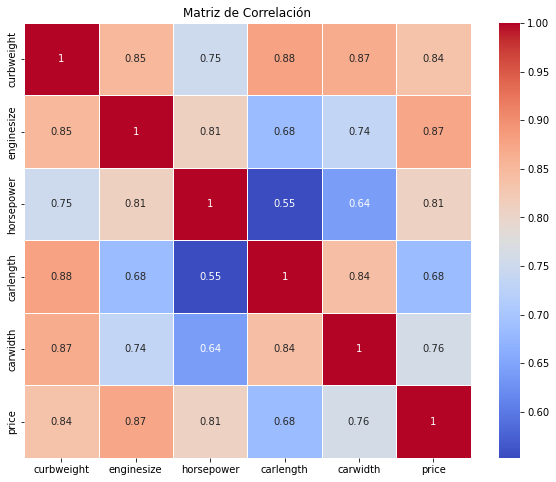

In [14]:
import seaborn as sns
#Let's see if there are a correlation between these columns:
correlation_matrix = df_new[interested_col].corr()
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [15]:
#cathegoric variables
dummy_aspiration = pd.get_dummies(df_new["aspiration"], prefix = "aspiration")
df_new_dummy = df_new[interested_col].join(dummy_aspiration)
df_new_dummy.head()

,curbweight,enginesize,horsepower,carlength,carwidth,aspiration,price,aspiration_std,aspiration_turbo
0,2548,130,111,168.8,64.1,std,13495.0,1,0
1,2548,130,111,168.8,64.1,std,16500.0,1,0
2,2823,152,154,171.2,65.5,std,16500.0,1,0
3,2337,109,102,176.6,66.2,std,13950.0,1,0
4,2824,136,115,176.6,66.4,std,17450.0,1,0


In [16]:
feature_columns = df_new_dummy.columns.values.tolist()
feature_columns.remove('price')
feature_columns.remove('aspiration')
feature_columns

['curbweight',
 'enginesize',
 'horsepower',
 'carlength',
 'carwidth',
 'aspiration_std',
 'aspiration_turbo']

In [17]:
#Train and test separation:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
#let's train our first model
lm1 = LinearRegression()
lm1.fit(X_train, Y_train)

LinearRegression()

In [19]:
print(lm1.intercept_)
for coef in list(zip(feature_columns, lm1.coef_)):
    print(coef)

-49661.52650907766
('curbweight', 2.836066464944484)
('enginesize', 72.05293067993111)
('horsepower', 54.3887739764746)
('carlength', -21.126122375939712)
('carwidth', 671.7955221526147)
('aspiration_std', 346.18022909909547)
('aspiration_turbo', -346.18022909909547)


In [20]:
R_square = lm1.score(X_test, Y_test)
R_square

0.8212953641125468

In [21]:
Y_pred = lm1.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
SSD

578414162.7784199

In [22]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_columns)-1))
print(f'residual standard error: {RSE}')

residual standard error: 1713.5088273520212


In [23]:
error = RSE*100/(np.mean(df_new_dummy["price"]))
error

12.906124737925852

In [24]:
print(f"Resume lm1:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm1:
R_square: 0.8212953641125468
SSD: 578414162.7784199 
RSE: 1713.5088273520212 
error: 12.906124737925852


In [25]:
#let's see what column we can take off:
print(feature_columns)
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]
estimator = SVR(kernel="linear")
print("Choosing 6 columns:")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)
print("Choosing 5 columns:")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)

['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth', 'aspiration_std', 'aspiration_turbo']
Choosing 6 columns:
[False  True  True  True  True False False]
[2 1 1 1 1 4 3]
Choosing 5 columns:
[ True  True  True  True  True False False]
[1 1 1 1 1 3 2]


In [26]:
#Linear model 2 Removing aspiration_std' and 'aspiration_turbo:
feature_columns = [
 'curbweight',
 'enginesize',
 'horsepower',
 'carlength',
 'carwidth']
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm2 = LinearRegression()
lm2.fit(X_train, Y_train)

LinearRegression()

In [27]:
print(lm2.intercept_)
for coef in list(zip(feature_columns, lm2.coef_)):
    print(coef)

-48350.7234450031
('curbweight', 2.406438020390184)
('enginesize', 77.45307393669066)
('horsepower', 52.53065980822981)
('carlength', -16.623252409827742)
('carwidth', 652.6682762131683)


In [28]:
R_square = lm2.score(X_test, Y_test)
Y_pred = lm2.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
RSE = np.sqrt(SSD/(len(df_new_dummy)-len(feature_columns)-1))
error = RSE*100/(np.mean(df_new["price"]))
print(f"Resume lm2:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm2:
R_square: 0.8209534347179516
SSD: 579520887.3103379 
RSE: 1706.5067426957387 
error: 12.853385133345494


In [29]:
#let's see what column can we take off:
print(feature_columns)
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]
estimator = SVR(kernel="linear")
print("Choosing 4 columns:")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)

['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth']
Choosing 4 columns:
[False  True  True  True  True]
[2 1 1 1 1]


In [30]:
#Linear model 3 :
feature_columns = [
 'enginesize',
 'horsepower',
 'carlength',
 'carwidth']
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm3 = LinearRegression()
lm3.fit(X_train, Y_train)

LinearRegression()

In [31]:
print(lm3.intercept_)
for coef in list(zip(feature_columns, lm3.coef_)):
    print(coef)

-57599.00896942123
('enginesize', 87.12384355776523)
('horsepower', 57.068785996553316)
('carlength', 32.15681520134517)
('carwidth', 731.6787866376275)


In [32]:
R_square = lm3.score(X_test, Y_test)
Y_pred = lm3.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
RSE = np.sqrt(SSD/(len(df_new_dummy)-len(feature_columns)-1))
error = RSE*100/(np.mean(df_new["price"]))
print(f"Resume lm3:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm3:
R_square: 0.8165728968583862
SSD: 593699395.4725739 
RSE: 1722.9326676811456 
error: 12.977104972667874


In [33]:
#let's see what column can we take off:
print(feature_columns)
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]
estimator = SVR(kernel="linear")
print("Choosing 3 columns:")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)

['enginesize', 'horsepower', 'carlength', 'carwidth']
Choosing 3 columns:
[ True  True  True False]
[1 1 1 2]


In [34]:
#Linear model 4 :
feature_columns = [
 'enginesize',
 'horsepower',
 'carlength']
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm4 = LinearRegression()
lm4.fit(X_train, Y_train)

LinearRegression()

In [35]:
print(lm4.intercept_)
for coef in list(zip(feature_columns, lm4.coef_)):
    print(coef)

-25059.30268779792
('enginesize', 93.81191049342144)
('horsepower', 63.15992981587034)
('carlength', 113.77068090657374)


In [36]:
R_square = lm4.score(X_test, Y_test)
Y_pred = lm4.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
RSE = np.sqrt(SSD/(len(df_new_dummy)-len(feature_columns)-1))
error = RSE*100/(np.mean(df_new["price"]))
print(f"Resume lm4:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm4:
R_square: 0.807584755636279
SSD: 622791355.8131752 
RSE: 1760.2455671814562 
error: 13.258145214537471


In [37]:
#let's see what column we can take off:
print(feature_columns)
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]
estimator = SVR(kernel="linear")
print("Choosing 2 columns:")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)

['enginesize', 'horsepower', 'carlength']
Choosing 2 columns:
[ True False  True]
[1 2 1]


In [38]:
#Linear model 5 :
feature_columns = [
 'enginesize',
 'carlength']
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm5 = LinearRegression()
lm5.fit(X_train, Y_train)

LinearRegression()

In [39]:
print(lm5.intercept_)
for coef in list(zip(feature_columns, lm1.coef_)):
    print(coef)

-24308.460328185458
('enginesize', 2.836066464944484)
('carlength', 72.05293067993111)


In [40]:
R_square = lm5.score(X_test, Y_test)
Y_pred = lm5.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
RSE = np.sqrt(SSD/(len(df_new_dummy)-len(feature_columns)-1))
error = RSE*100/(np.mean(df_new["price"]))
print(f"Resume lm5:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm5:
R_square: 0.8060605768563852
SSD: 627724672.6715698 
RSE: 1762.8238381961828 
error: 13.277564716084868


In [41]:
#let's see what column we can take off:
print(feature_columns)
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]
estimator = SVR(kernel="linear")
print("Choosing 1 column:")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X,Y)
print(selector.support_)
print(selector.ranking_)

['enginesize', 'carlength']
Choosing 1 column:
[ True False]
[1 2]


In [42]:
#Linear model 6 :
feature_columns = [
 'enginesize']
X = df_new_dummy[feature_columns]
Y = df_new_dummy["price"]

# Dividir el dataset en 80% entrenamiento y 20% validación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lm6 = LinearRegression()
lm6.fit(X_train, Y_train)

LinearRegression()

In [43]:
print(lm6.intercept_)
for coef in list(zip(feature_columns, lm6.coef_)):
    print(coef)

-7741.765067166594
('enginesize', 165.8445625610323)


In [44]:
R_square = lm6.score(X_test, Y_test)
Y_pred = lm6.predict(X_test)
SSD = np.sum((Y_pred - Y_test)**2)
RSE = np.sqrt(SSD/(len(df_new_dummy)-len(feature_columns)-1))
error = RSE*100/(np.mean(df_new["price"]))
print(f"Resume lm6:\nR_square: {R_square}\nSSD: {SSD} \nRSE: {RSE} \nerror: {error}")

Resume lm6:
R_square: 0.8040958796678975
SSD: 634083817.6022472 
RSE: 1767.3611979309596 
error: 13.31174004671819


The best model we can use is lm6 because, even though, it is truth that its R_square is a little bit lower than for the models lm1, lm2, lm3, lm4 and lm5, it can be appreciated that lm6 is the most simplified model in compare to the other 5 models. (The difference in the R_square value is not that relevant, as it varies only 2 tenths between these models)

'price' = 165.84456*'enginesize' - 7741.76506